<a href="https://colab.research.google.com/github/macedojoaopedro/TrabalhoAprendizagemmaquina/blob/feature%2FalteracoesTeste/Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Olá! Vamos analisar seu arquivo de dados.
Qual o seu nome? teste
Por favor, faça o upload do arquivo CSV.


Saving Dados.csv to Dados (7).csv

Resumo dos dados:
Total de registros: 5000
Homens: 2551
Mulheres: 2449
Faltam informações sobre escolaridade dos pais em: 1025 registros

Nomes dos homens:
['Maria', 'Ahmed', 'Liam', 'Ahmed', 'Ahmed', 'John', 'John', 'Liam', 'Ahmed', 'Liam', 'John', 'Emma', 'Ahmed', 'Sara', 'Emma', 'Emma', 'Sara', 'Ali', 'Sara', 'Ali', 'Ali', 'John', 'Omar', 'Sara', 'Liam', 'Maria', 'Maria', 'Liam', 'Emma', 'Emma', 'Omar', 'Ali', 'John', 'Ahmed', 'Omar', 'Ali', 'Omar', 'Maria', 'Ali', 'Maria', 'Emma', 'Sara', 'Sara', 'Maria', 'Omar', 'Maria', 'Ahmed', 'Liam', 'Emma', 'Emma', 'Emma', 'Ahmed', 'Omar', 'Sara', 'Liam', 'Liam', 'Maria', 'Ali', 'Liam', 'Ahmed', 'Sara', 'Omar', 'Ahmed', 'Sara', 'Ali', 'Maria', 'Maria', 'Maria', 'Ahmed', 'Omar', 'Ali', 'Ali', 'Ali', 'Maria', 'Omar', 'John', 'John', 'John', 'Ali', 'Ahmed', 'Sara', 'Ali', 'Maria', 'Omar', 'Ali', 'Sara', 'Ali', 'Liam', 'Omar', 'Emma', 'John', 'Maria', 'Emma', 'John', 'Ahmed', 'John', 'Ali', 'Omar', 'Omar', 'John

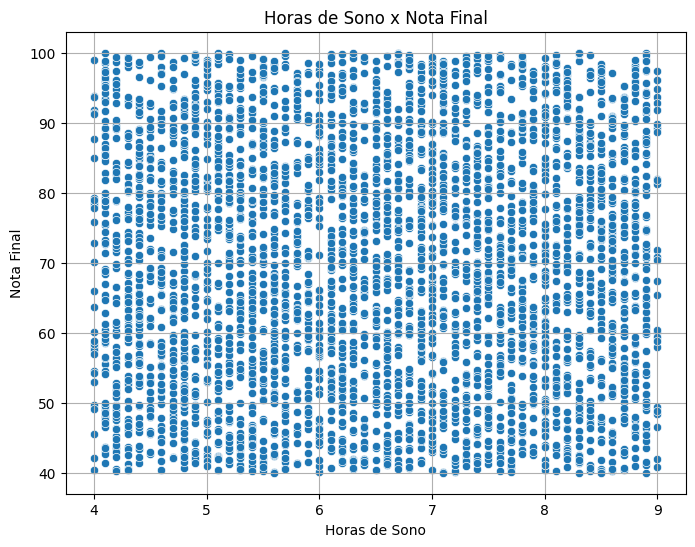

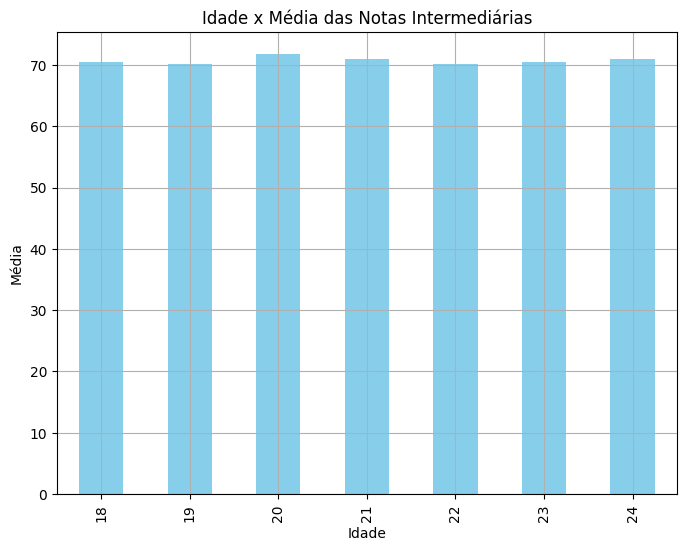

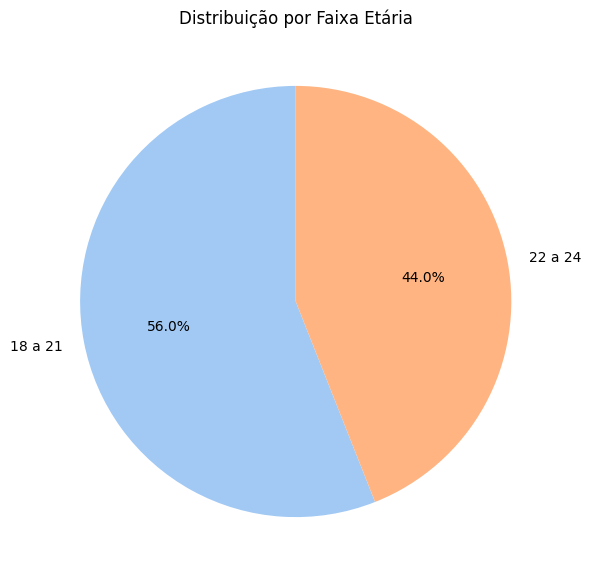

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import logging
from google.colab import files

logging.basicConfig(filename='log.txt', level=logging.INFO)

def carregar_dados(caminho_arquivo):
    if not os.path.exists(caminho_arquivo):
        print("Caminho do arquivo não encontrado.")
        logging.error(f"Erro: Caminho do arquivo não encontrado - {caminho_arquivo}")
        exit()

    if caminho_arquivo.lower().endswith('.csv'):
        return pd.read_csv(caminho_arquivo)
    else:
        print("Por favor, use um arquivo no formato CSV.")
        logging.error(f"Erro: Formato de arquivo inválido - {caminho_arquivo}")
        exit()

def validar_coluna_numerica(coluna, dados):
    if dados[coluna].dtype not in ['int64', 'float64']:
        print("A coluna escolhida não é numérica.")
        logging.error(f"Erro: A coluna '{coluna}' não é numérica.")
        return False
    return True

def analise_coluna(coluna, dados):
    media = dados[coluna].mean()
    mediana = dados[coluna].median()
    moda = dados[coluna].mode()[0]
    desvio_padrao = dados[coluna].std()

    print(f"\nAnálise de '{coluna}':")
    print(f"Média: {media:.2f}")
    print(f"Mediana: {mediana:.2f}")
    print(f"Moda: {moda}")
    print(f"Desvio padrão: {desvio_padrao:.2f}")

def main():
    print("Olá! Vamos analisar seu arquivo de dados.")

    nome_usuario = input("Qual o seu nome? ")
    logging.info(f"Usuário {nome_usuario} iniciou a análise.")

    print("Por favor, faça o upload do arquivo CSV.")
    uploaded = files.upload()

    arquivo_nome = next(iter(uploaded))

    dados = carregar_dados(arquivo_nome)

    dados = dados.rename(columns={
        'First_Name': 'Nome',
        'Gender': 'Sexo',
        'Parent_Education_Level': 'Escolaridade_Responsável',
        'Attendance (%)': 'Presença (%)',
        'Sleep_Hours_per_Night': 'Horas_Sono',
        'Study_Hours_per_Day': 'Horas_Estudo',
        'Age': 'Idade',
        'Final_Score': 'Nota_Final',
        'Midterm_Score': 'Nota_Intermediária'
    })

    print("\nResumo dos dados:")
    print(f"Total de registros: {len(dados)}")
    print(f"Homens: {(dados['Sexo'] == 'Male').sum()}")
    print(f"Mulheres: {(dados['Sexo'] == 'Female').sum()}")
    print(f"Faltam informações sobre escolaridade dos pais em: {dados['Escolaridade_Responsável'].isna().sum()} registros")

    print("\nNomes dos homens:")
    print(dados[dados['Sexo'] == 'Male']['Nome'].to_list())

    print("\nNomes das mulheres:")
    print(dados[dados['Sexo'] == 'Female']['Nome'].to_list())

    dados = dados.dropna(subset=['Escolaridade_Responsável'])
    presenca_mediana = dados['Presença (%)'].median()
    dados['Presença (%)'] = dados['Presença (%)'].fillna(presenca_mediana)

    print("\nApós limpeza dos dados:")
    print(f"Registros válidos: {len(dados)}")
    print(f"Soma da presença: {dados['Presença (%)'].sum():.2f}")

    coluna = input("\nDigite a coluna que deseja analisar (ex: Nota_Final, Horas_Sono, Idade): ")

    if coluna in dados.columns:
        if validar_coluna_numerica(coluna, dados):
            analise_coluna(coluna, dados)
    else:
        print("Essa coluna não existe nos dados.")
        logging.error(f"Erro: A coluna '{coluna}' não existe nos dados.")

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=dados, x='Horas_Sono', y='Nota_Final')
    plt.title('Horas de Sono x Nota Final')
    plt.xlabel('Horas de Sono')
    plt.ylabel('Nota Final')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    dados.groupby('Idade')['Nota_Intermediária'].mean().plot(kind='bar', color='skyblue')
    plt.title('Idade x Média das Notas Intermediárias')
    plt.xlabel('Idade')
    plt.ylabel('Média')
    plt.grid(True)
    plt.show()

    def faixa_etaria(idade):
        if idade <= 17:
            return 'Até 17'
        elif idade <= 21:
            return '18 a 21'
        elif idade <= 24:
            return '22 a 24'
        else:
            return '25 ou mais'

    dados['Faixa_Etaria'] = dados['Idade'].apply(faixa_etaria)
    dados['Faixa_Etaria'].value_counts().plot.pie(
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), figsize=(7, 7)
    )
    plt.title('Distribuição por Faixa Etária')
    plt.ylabel('')
    plt.show()

if __name__ == "__main__":
    main()
